<a href="https://colab.research.google.com/github/hernandezhdd/TrabajosMachineLearning/blob/master/TP5/TP5_ViolentCrimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Violent Crime Rates by US State
This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas. The goal of this project is to identify hierarchies of clusters of US states according to violent crime rates data [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html). Feel free to augment this data set with other sources. 

In [ ]:
import pandas as pd
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")

violent_crime = violent_crime.rename(columns = {'Unnamed: 0':'state'})
violent_crime.head(2)

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


<Figure size 432x288 with 0 Axes>

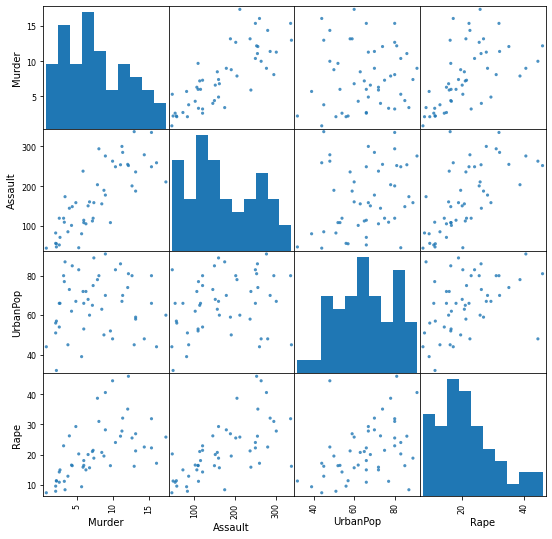

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
pd.plotting.scatter_matrix(violent_crime, figsize=(9,9), marker = 'o', hist_kwds = {'bins': 10}, s = 10, alpha = 0.8)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = violent_crime.drop(columns='state').to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

Busco la cantidad de clusters, siguiendo al tutorial:

https://www.youtube.com/watch?v=s6PSSzeUMFk

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

wcss = []

for i in range(1,15): #20 es claramente demasiado siendo que hay 50 datos
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

wcss = np.array(wcss)

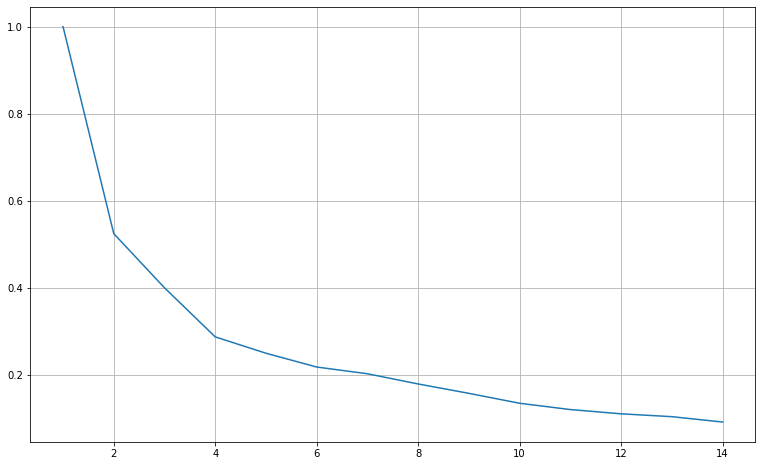

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
plt.plot(range(1,15), wcss/wcss.max())
plt.grid()
plt.show()

Aparentemente acá hay que elegir el punto donde aumentar k, no disminuye fuertemente la suma de errores cuadrados. De k=2 a k=3 el wcss baja un 15% del valor max, mientras que de 3 a 4 baja otros 10%. Podría usar k=3 o k=4.

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

violent_crime['kmeans_cluster'] = kmeans.labels_

violent_crime.head(2)

,state,Murder,Assault,UrbanPop,Rape,kmeans_cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1


<Figure size 432x288 with 0 Axes>

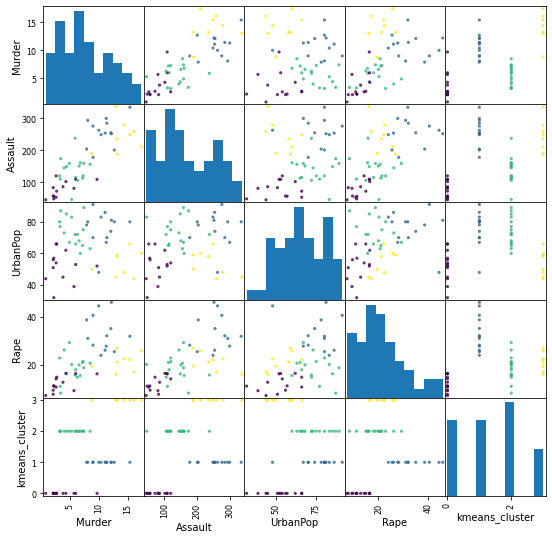

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
pd.plotting.scatter_matrix(violent_crime, c=violent_crime['kmeans_cluster'], figsize=(9,9), marker = 'o', hist_kwds = {'bins': 10}, s = 10, alpha = 0.8)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #encontrar las 2 mas importantes
pca_crimes = pca.fit_transform(violent_crime.drop(columns=['state','kmeans_cluster']))
df_pca_crimes = pd.DataFrame(data = pca_crimes, columns = ['x','y'])
df_pca_crimes['kmeans_cluster'] = violent_crime['kmeans_cluster']
df_pca_crimes['state'] = violent_crime['state']
df_pca_crimes.head(2)

,x,y,kmeans_cluster,state
0,64.802164,11.448007,3,Alabama
1,92.827450,17.982943,1,Alaska


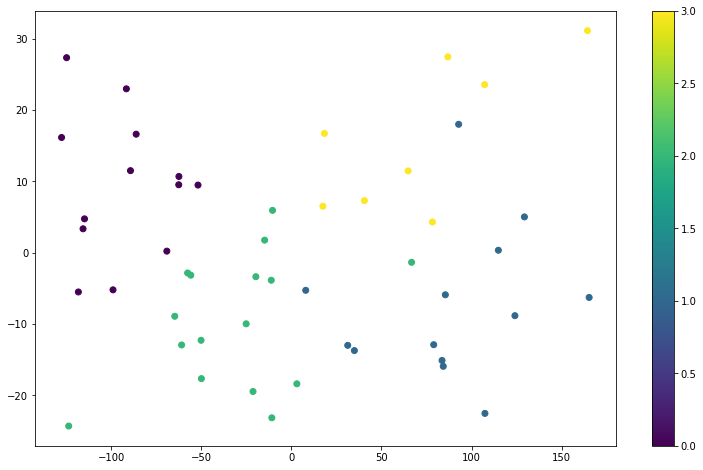

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
plt.scatter(df_pca_crimes['x'], df_pca_crimes['y'], c=df_pca_crimes['kmeans_cluster'].to_numpy())
plt.colorbar()
plt.show()

Ahora voy a graficar los clusters en el mapa de EEUU, esto lo voy a sacar directamente del trabajo de Ivan:

https://github.com/ivanrango/Machine-Learning/blob/master/Trabajo_Pr%C3%A1ctico_5.ipynb

In [ ]:
!pip install plotly==4.13.0
!pip install kaleido 

In [ ]:
df_pca_crimes.head(1)

,x,y,kmeans_cluster,state
0,64.802164,11.448007,3,Alabama


In [ ]:
import pandas as pd
import requests
import plotly.express as px
import plotly.io as pio

repo_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' #Archivo GeoJSON
us_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df_pca_crimes, 
                    geojson=us_regions_geo, 
                    locations='state', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='kmeans_cluster', #El color depende de las cantidades
                    color_continuous_scale="viridis", #greens
                    scope="usa",
                    width = 1000,
                    height = 600,
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(

    title_text = 'Crimenes violentos en EEUU divididos en clusters (KMeans)',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=16,
        # color="#7f7f7f"
    )
)
fig.show()
# fig.show(renderer="svg")

Pego imágenes abajo para que se pueda ver en github.

## Con k = 3

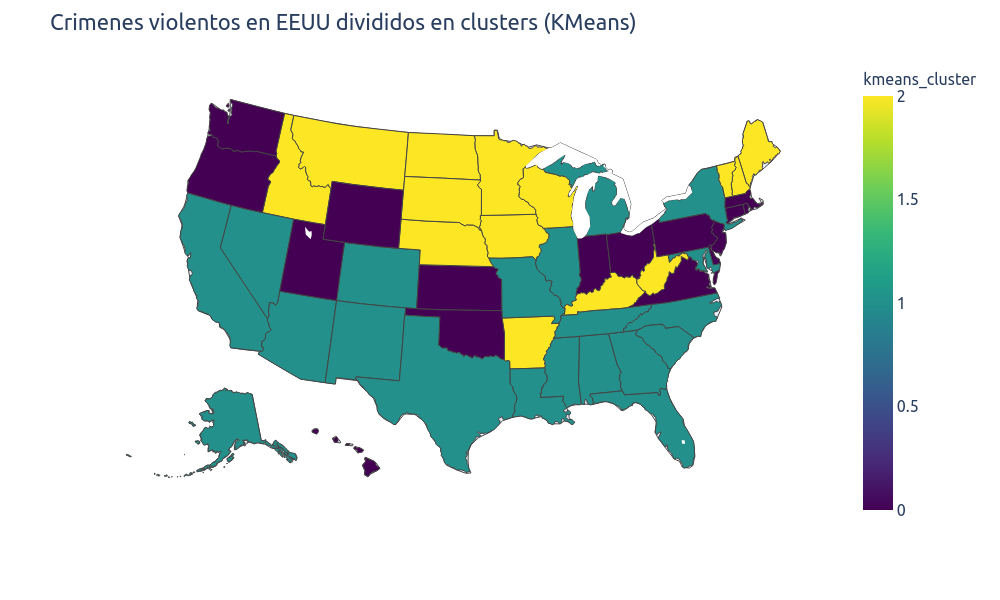

## Con k = 4

Es interesante como el sureste forma un cluster.

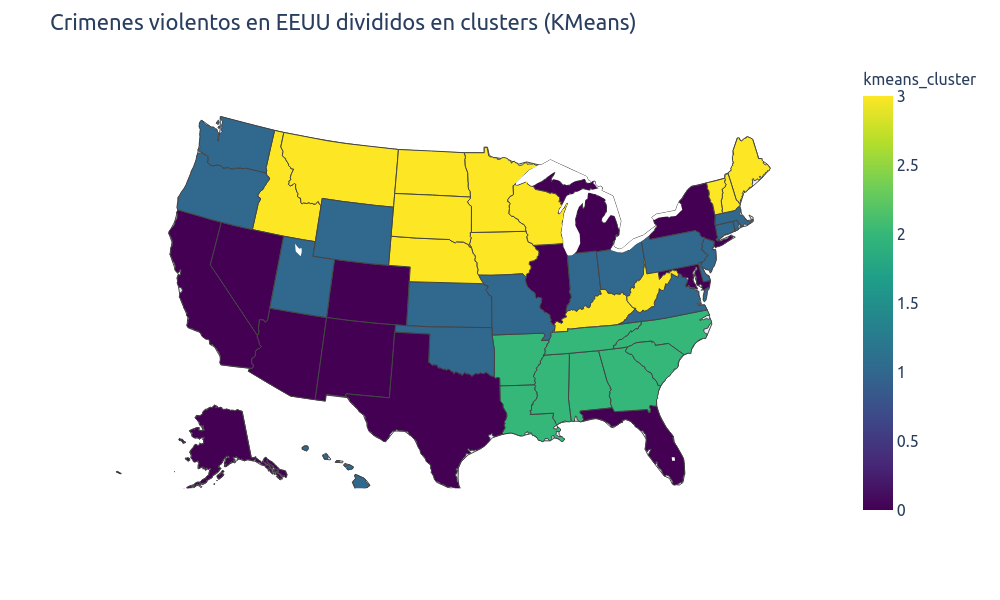

## Con k = 5

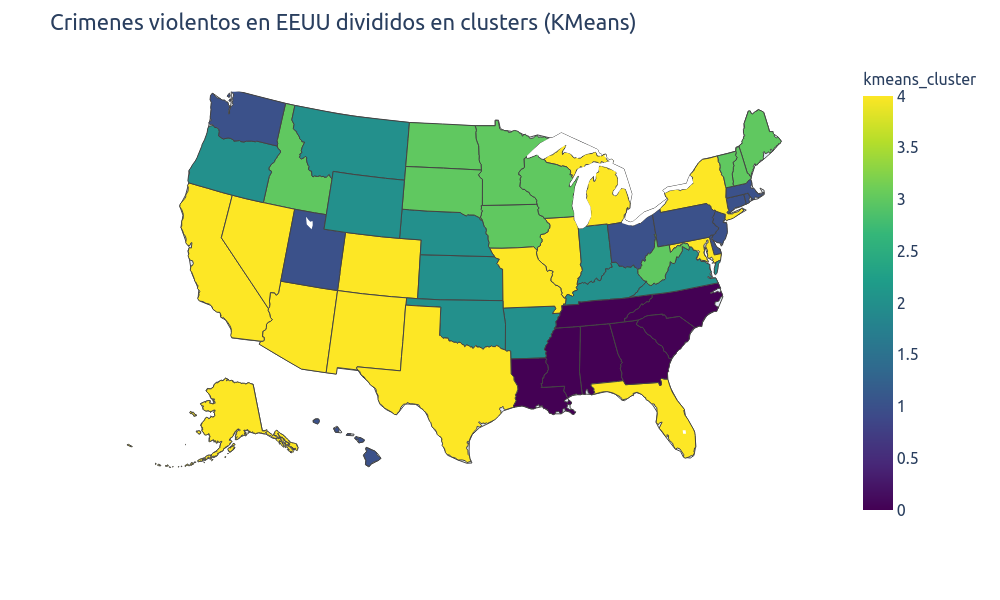

# Ahora voy a hacer clustering jerárquico

Esto está creado con:

https://www.youtube.com/watch?v=iT4xYghI7Rg

In [42]:
import pandas as pd
violent_crime_hier = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")

violent_crime_hier = violent_crime_hier.rename(columns = {'Unnamed: 0':'state'})
violent_crime_hier.head(1)

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2


In [43]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

data = violent_crime_hier.drop(columns='state').to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Creamos un dendograma

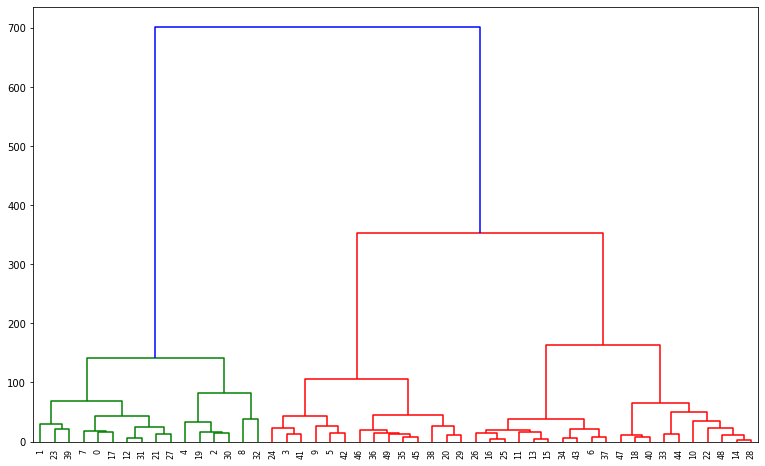

In [44]:
Clustering_Jerarquico = sch.linkage(data, 'ward')
plt.figure(figsize=(13,8))
Dendograma = sch.dendrogram(Clustering_Jerarquico)
plt.show()

In [45]:
Clusters = sch.fcluster(Clustering_Jerarquico, t=150, criterion = 'distance')
Clusters

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 4, 3, 1, 3, 4, 3, 3, 1, 4, 1, 2, 1,
       4, 1, 2, 3, 3, 1, 4, 2, 1, 1, 1, 4, 3, 2, 2, 3, 2, 1, 4, 2, 2, 3,
       4, 2, 2, 4, 4, 2], dtype=int32)

In [46]:
violent_crime_hier['cluster_hier'] = Clusters
violent_crime_hier['kmeans_cluster'] = kmeans.labels_

violent_crime_hier.head(1)

,state,Murder,Assault,UrbanPop,Rape,cluster_hier,kmeans_cluster
0,Alabama,13.2,236,58,21.2,1,3


<Figure size 432x288 with 0 Axes>

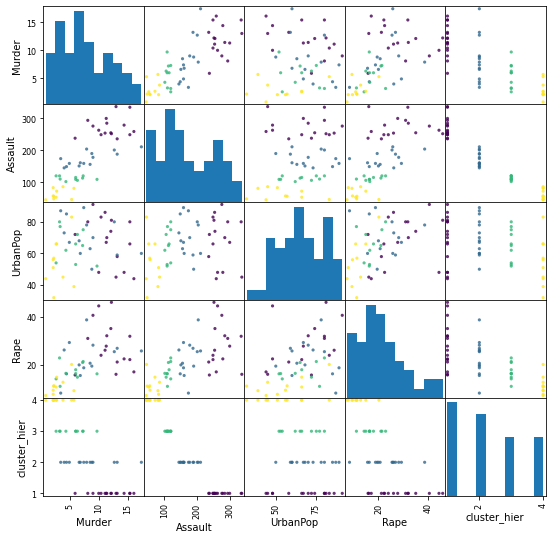

In [47]:
import matplotlib.pyplot as plt

plt.figure()
pd.plotting.scatter_matrix(violent_crime_hier.drop(columns='kmeans_cluster'), c= violent_crime_hier['cluster_hier'], figsize=(9,9), marker = 'o', hist_kwds = {'bins': 10}, s = 10, alpha = 0.8)
plt.show()

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #encontrar las 2 mas importantes
pca_hier_crimes = pca.fit_transform(violent_crime_hier.drop(columns=['state','kmeans_cluster','cluster_hier']))
df_pca_hier_crimes = pd.DataFrame(data = pca_hier_crimes, columns = ['x','y'])
df_pca_hier_crimes['cluster_hier'] = violent_crime_hier['cluster_hier']
df_pca_hier_crimes['state'] = violent_crime_hier['state']
df_pca_hier_crimes.head(2)

,x,y,cluster_hier,state
0,64.802164,11.448007,1,Alabama
1,92.827450,17.982943,1,Alaska


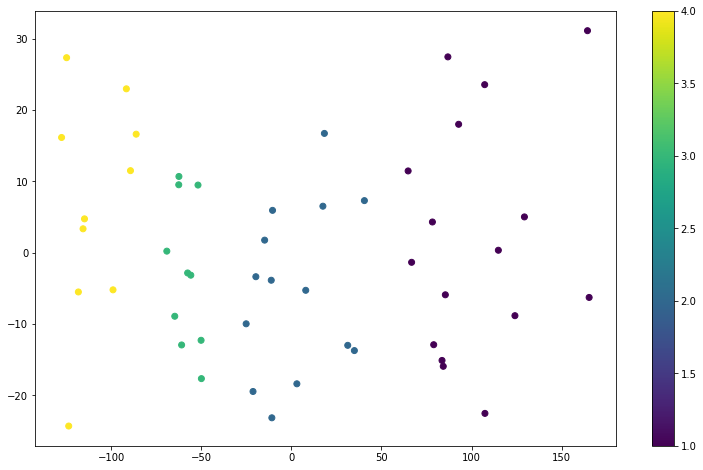

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
plt.scatter(df_pca_hier_crimes['x'], df_pca_hier_crimes['y'], c=df_pca_hier_crimes['cluster_hier'].to_numpy())
plt.colorbar()
plt.show()

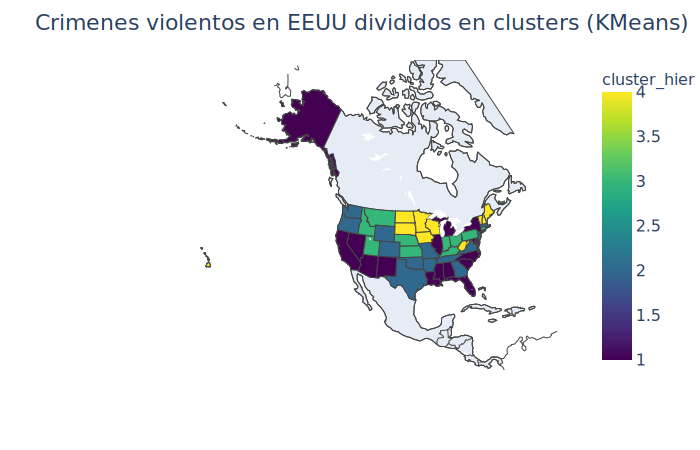

In [58]:
import pandas as pd
import requests
import plotly.express as px
import plotly.io as pio

repo_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' #Archivo GeoJSON
us_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=violent_crime_hier, 
                    geojson=us_regions_geo, 
                    locations='state', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='cluster_hier', #El color depende de las cantidades
                    color_continuous_scale="viridis", #greens
                    scope="north america",
                    width = 1000,
                    height = 600,
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(

    title_text = 'Crimenes violentos en EEUU divididos en clusters',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=16,
        # color="#7f7f7f"
    )
)
# fig.show()
fig.show(renderer="svg")